In [71]:
import re
import ast
import json 



cfile = '/opt/dask-distributed/benchmark/stats/svd_tall_skinny_matrix_400k_x_20k_0815466e.colors'
task_style = {}
with open(cfile, 'r') as cfd:
    raw = cfd.read().split('\n')
    for ln in raw:
        if not ln: 
            continue
        task_name_str = re.findall(r'\((.*?)\)', ln)
        task_name = f'({task_name_str[0]})'
        
        task_style_str = re.findall(r'\[(.*?)\]', ln)
        if task_name not in task_style:
            task_style[task_name] = {}
        task_style[task_name]['actual'] = {s.split('=')[0]: s.split('=')[1].replace('/paired12/', '').replace('"', '') for s in task_style_str[0].split(" ")}    

cfile = '/local0/serverless-sim/simulator.colors'
with open(cfile, 'r') as cfd:
    raw = cfd.read().split('\n')
    for ln in raw:
        if not ln: 
            continue
        task_name_str = re.findall(r'\((.*?)\)', ln)
        task_name = f'({task_name_str[0]})'
        
        task_style_str = re.findall(r'\[(.*?)\]', ln)
        if task_name not in task_style:
            task_style[task_name] = {}
        #print(task_style_str)
        task_style[task_name]['simulator'] = {s.split('=')[0]: s.split('=')[1].replace('/paired12/', '').replace('"', '') for s in task_style_str[0].split(" ")}
print(json.dumps(task_style, indent=4))
        

{
    "('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 3, 0)": {
        "actual": {
            "style": "filled",
            "fillcolor": "1",
            "color": "1"
        },
        "simulator": {
            "style": "filled",
            "fillcolor": "5",
            "color": "5"
        }
    },
    "('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 3, 0)": {
        "actual": {
            "style": "filled",
            "fillcolor": "1",
            "color": "1"
        },
        "simulator": {
            "style": "filled",
            "fillcolor": "5",
            "color": "1"
        }
    },
    "('qr-stack-svd-getitem-ba1238b38b9a8ce33e627105989e8010-v2', 0, 0)": {
        "actual": {
            "style": "filled",
            "fillcolor": "1",
            "color": "1"
        },
        "simulator": {
            "style": "filled",
            "fillcolor": "1",
            "color": "None"
        }
    },
    "('getitem-ba1238b38b9a8ce33e627105989e8010

In [92]:
# color the graph
import graph_tool.all as gt
import copy
import matplotlib.colors as mcolors

css_colors = list(mcolors.CSS4_COLORS.keys())


gfile = '/opt/dask-distributed/benchmark/stats/svd_tall_skinny_matrix_400k_x_20k_0815466e.g'

with open(gfile, 'r') as fd:
    raw = fd.read().split('\n')
    g = gt.Graph(directed=True)
    vid_to_vx = {}
    name_to_vid = {}
    
    g.vertex_properties['name'] = g.new_vertex_property("string")
    g.vertex_properties['color'] = g.new_vertex_property("string")
    g.vertex_properties['icolor'] = g.new_vertex_property("int")
    g.vertex_properties['simcolor'] = g.new_vertex_property("string")
    g.vertex_properties['isimcolor'] = g.new_vertex_property("string")
    for ln in raw:
        if ln.startswith('v'):
            _, vid, name = ln.split(',', 2)
            v = g.add_vertex()
            vid_to_vx[vid] = v
            name_to_vid[name] = vid
            
            g.vp.color[v] = mcolors.CSS4_COLORS[css_colors[int(task_style[name]['actual']['fillcolor'])]]
            g.vp.icolor[v] = int(task_style[name]['actual']['fillcolor'])
            g.vp.simcolor[v] = mcolors.CSS4_COLORS[css_colors[int(task_style[name]['simulator']['fillcolor'])]]
            g.vp.isimcolor[v] = int(task_style[name]['simulator']['fillcolor'])
            print(name, g.vp.icolor[v])
            
    for ln in raw:        
        if ln.startswith('e'):
            _, vsrc, vdst, _ = ln.split(',', 3)
            g.add_edge(vid_to_vx[vsrc], vid_to_vx[vdst])

('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 11, 0) 16
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 9, 0) 14
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 0, 0) 8
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 9, 0) 14
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 0, 0) 8
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 11, 0) 16
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 2, 0) 4
('getitem-ba1238b38b9a8ce33e627105989e8010-v2', 0, 0) 1
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 13, 0) 19
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 2, 0) 4
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 17, 0) 6
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 4, 0) 2
('getitem-ba1238b38b9a8ce33e627105989e8010-r1', 15, 0) 10
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 15, 0) 10
('qr-random_sample-getitem-ba1238b38b9a8ce33e627105989e8010-r1', 4, 0) 2
('qr-random_sample-getitem-ba1238b38b9a8ce33e

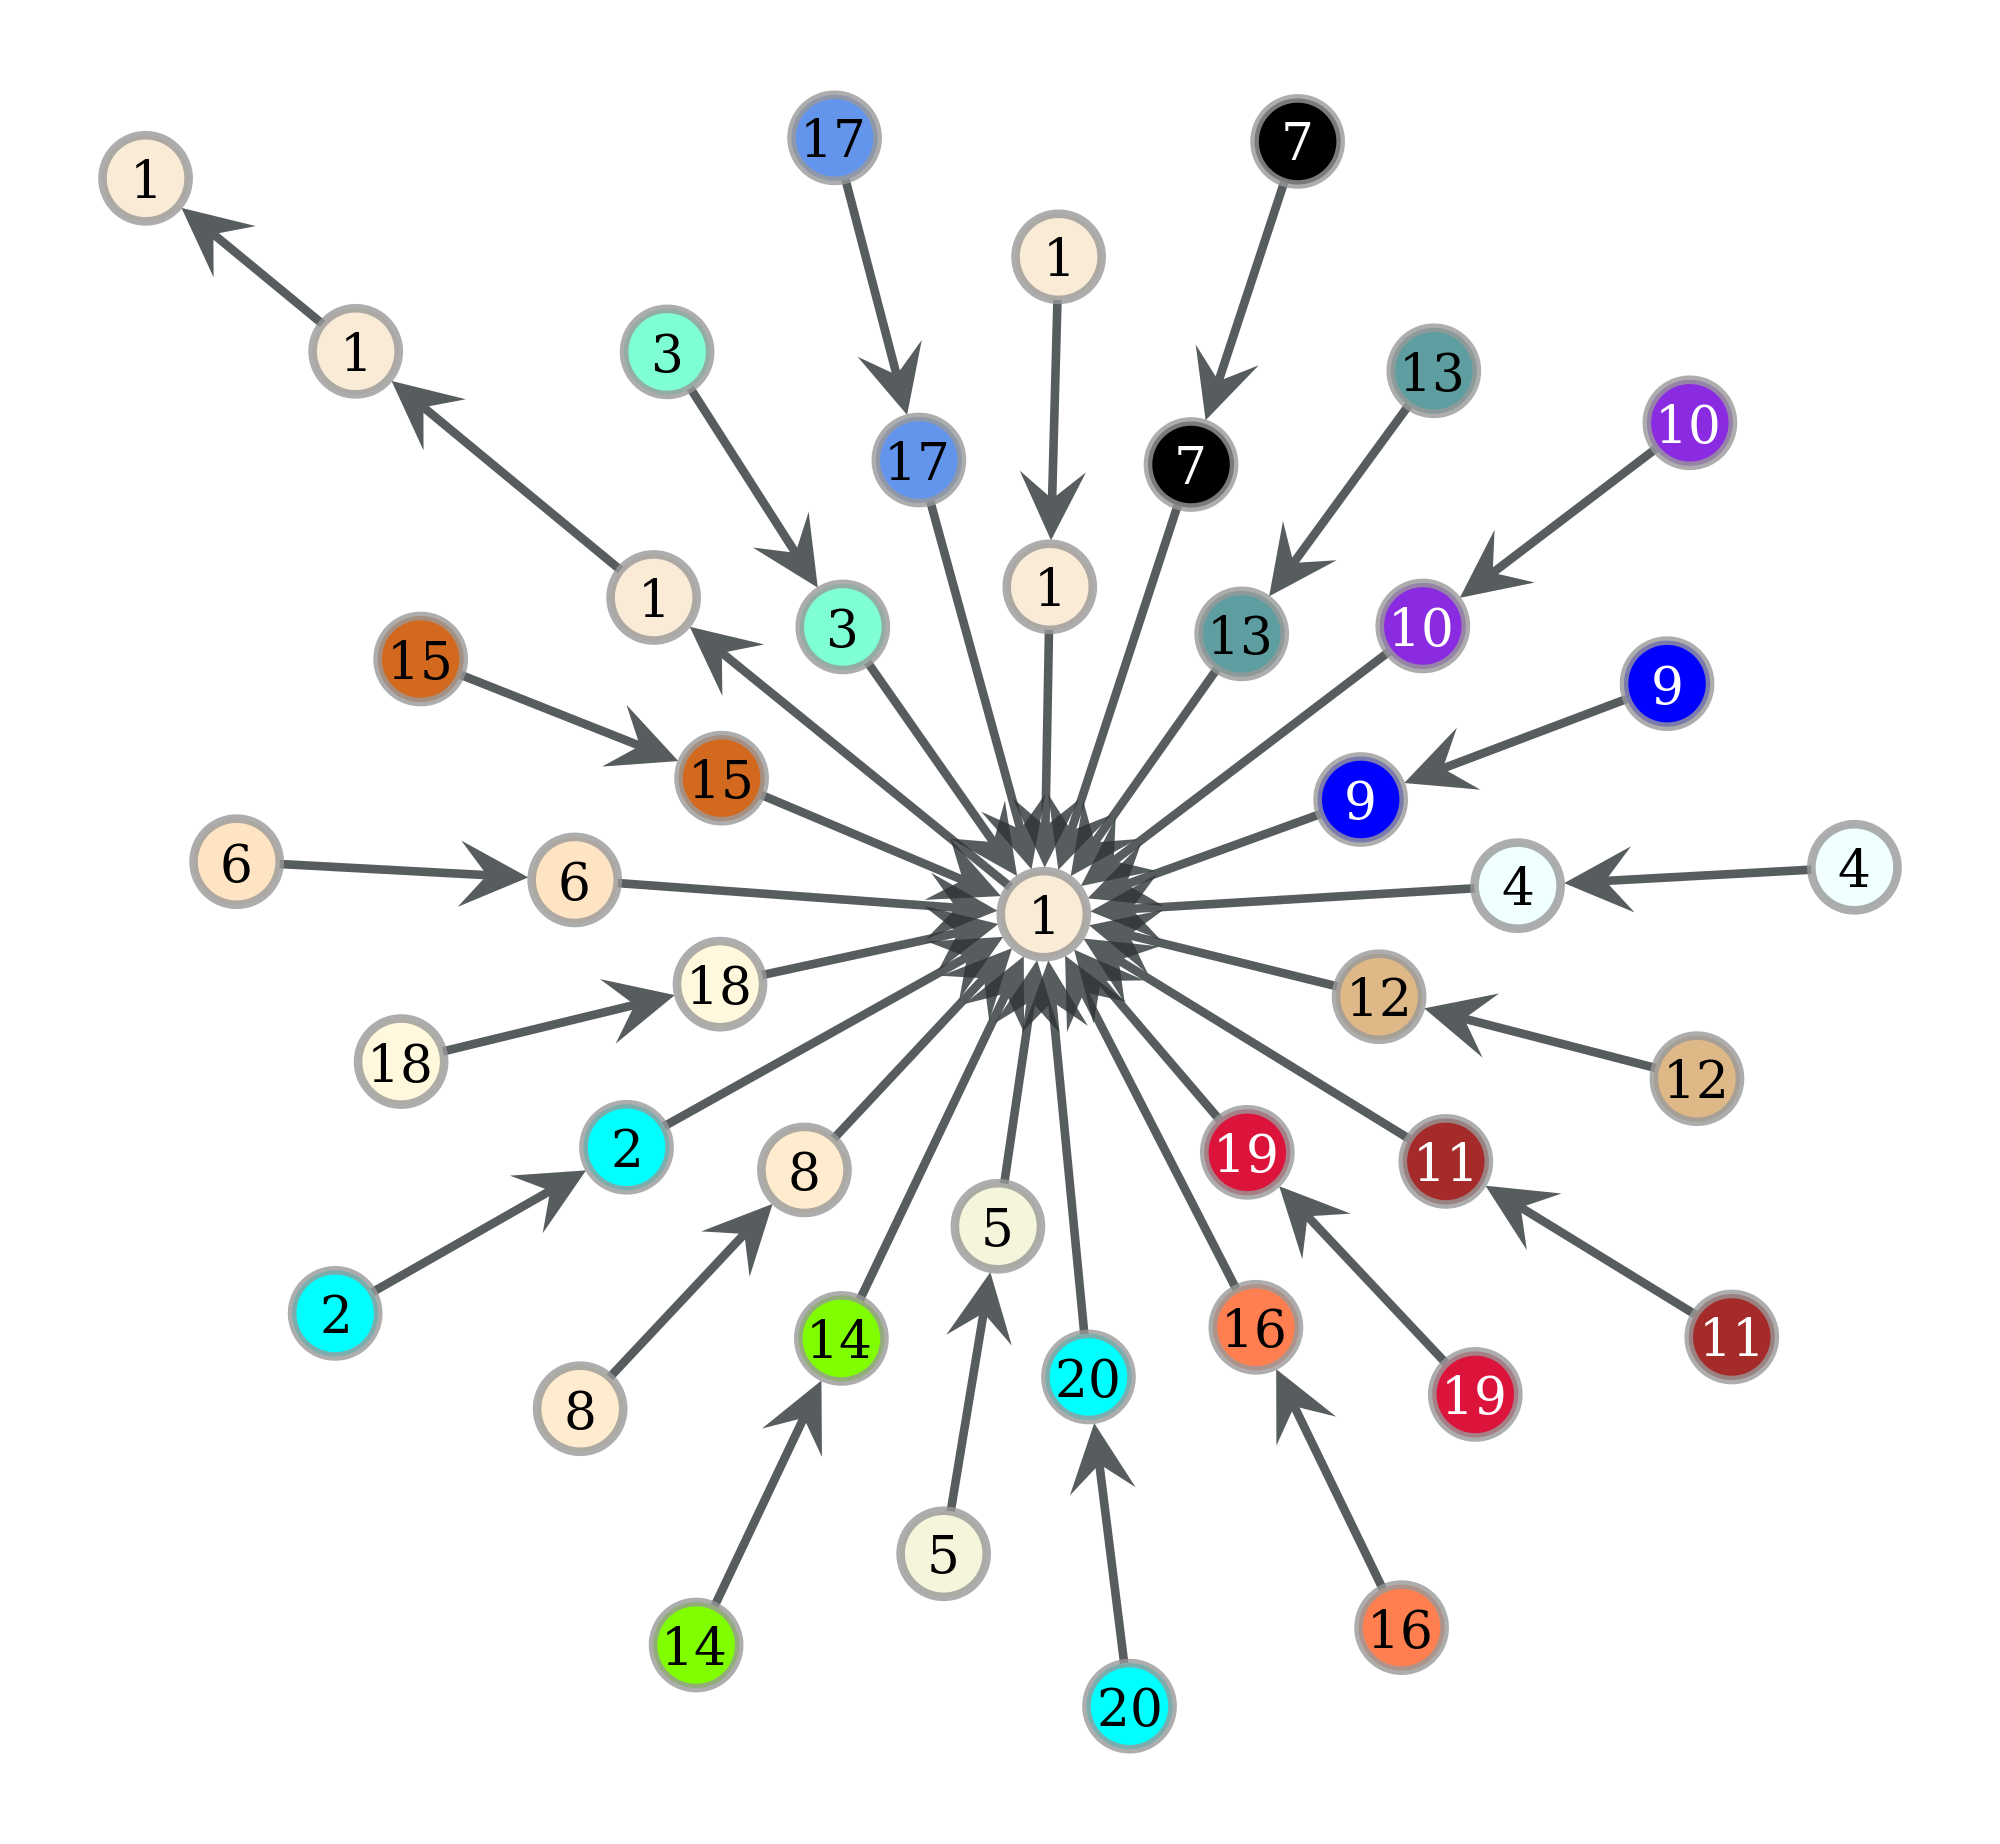

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f606c50f340, at 0x7f606c4ed250>

In [93]:
gt.graph_draw(g, vertex_text=g.vp.icolor, vertex_fill_color=g.vp.color, output_size = (1000, 1000))

In [86]:
12337.209425942168 - 12522.994376187595

3*3600+11*60+26

11486

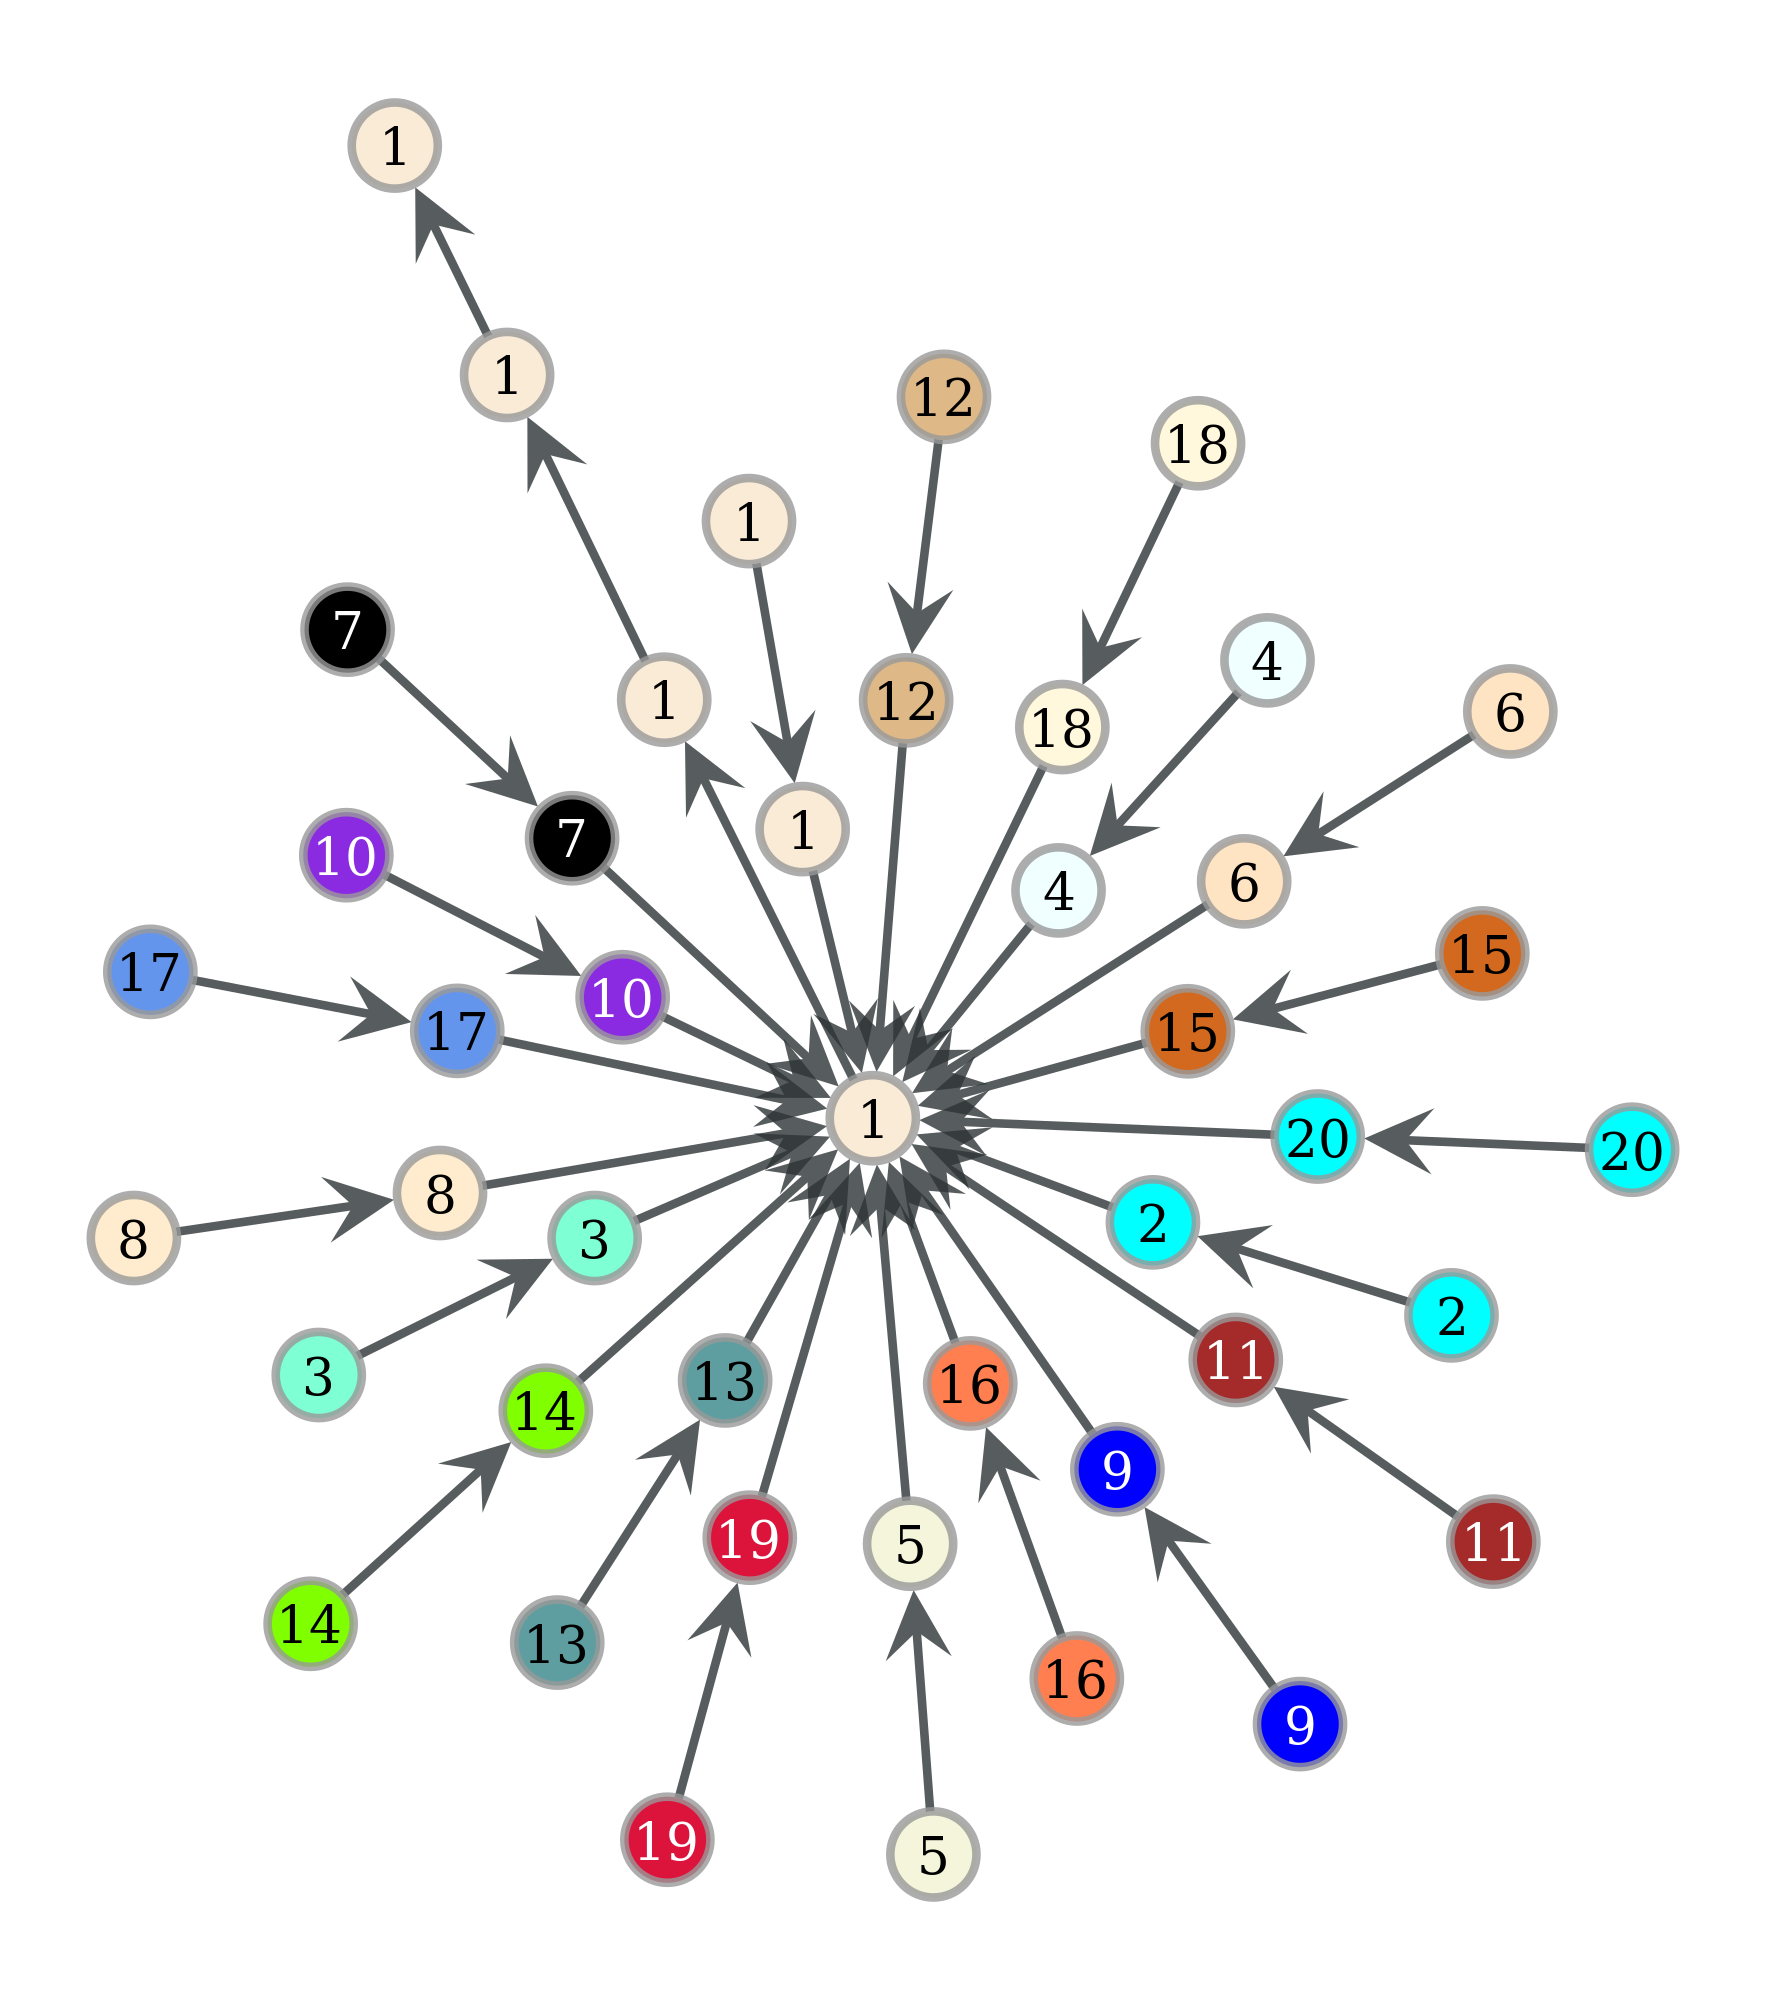

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f606c50f340, at 0x7f606c4dfca0>

In [94]:
gt.graph_draw(g, vertex_text=g.vp.isimcolor, vertex_fill_color=g.vp.simcolor, output_size = (1000, 1000))